### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/gbhangle/OneDrive - Capgemini/Desktop/Uber Trips Analysis/data/uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [18]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Group by date and count the number of pickups
df['BinnedDate'] = pd.to_datetime(df['Date/Time']).dt.date


# Find the date with the highest number of pickups
grouped_data = df.groupby('BinnedDate').size()


max_date = grouped_data.idxmax()
max_count = grouped_data.max()

print("Date with the most number of Uber pickups:", max_date)
print("Count:", max_count)





Date with the most number of Uber pickups: 2014-08-07
Count: 32759


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [26]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
filtered_data = df[df['BinnedDate'] == max_date]
display(filtered_data)
# Get the count of pickups on the highest date
pickup_count = len(filtered_data)
display(pickup_count)



,Date/Time,Lat,Lon,Base,BinnedDate
6944,2014-08-07 00:03:00,40.7455,-73.9895,B02512,2014-08-07
6945,2014-08-07 00:09:00,40.7499,-74.0025,B02512,2014-08-07
6946,2014-08-07 00:10:00,40.7417,-74.0037,B02512,2014-08-07
6947,2014-08-07 00:16:00,40.6416,-73.7879,B02512,2014-08-07
6948,2014-08-07 00:16:00,40.7008,-73.9405,B02512,2014-08-07
...,...,...,...,...,...
783791,2014-08-07 23:47:00,40.7337,-73.9925,B02764,2014-08-07
783792,2014-08-07 23:47:00,40.7245,-73.9934,B02764,2014-08-07
783793,2014-08-07 23:49:00,40.7624,-74.0204,B02764,2014-08-07
783794,2014-08-07 23:53:00,40.7801,-73.9589,B02764,2014-08-07


32759

#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [27]:
# Count the number of unique TLC base companies
base_count = df['Base'].nunique()
display(base_count)


5

#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [31]:
# Group by TLC base company and count the number of pickups
groupby_base = df.groupby('Base').size()
display(groupby_base)
# Find the TLC base company with the highest number of pickups
max_base = groupby_base.idxmax()
max_basecount = groupby_base.max()
display(max_base)
display(max_basecount)

Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64

'B02617'

355803

#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [32]:
# Group by TLC base company and count the number of pickups
groupby_base = df.groupby('Base').size()
display(groupby_base)



Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64

#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [44]:
# Extract the hour from the 'Date/Time' column
df['Hour'] = pd.to_datetime(df['Date/Time']).dt.hour

# Group by hour and count the number of pickups
hourly_counts = df.groupby('Hour').size()

# Find the hour with the highest number of pickups
max_hour = hourly_counts.idxmax()

print("Hour with the highest number of pickups:", max_hour)



Hour with the highest number of pickups: 17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

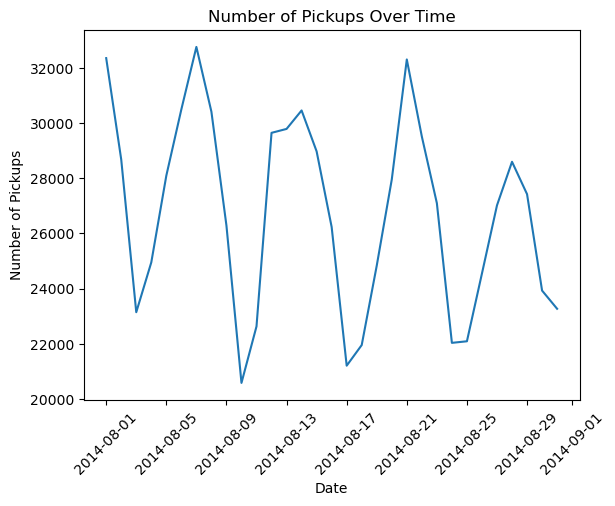

In [45]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
pickup_counts = df.groupby('BinnedDate').size()


# Create a line plot to visualize the number of pickups over time
plt.plot(pickup_counts.index, pickup_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.title('Number of Pickups Over Time')
plt.xticks(rotation=45)
plt.show()




#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

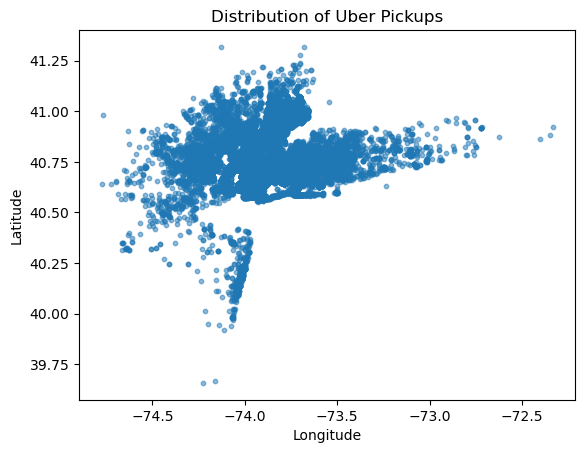

In [46]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.scatter(df['Lon'], df['Lat'], s=10, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Uber Pickups')
plt.show()


#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

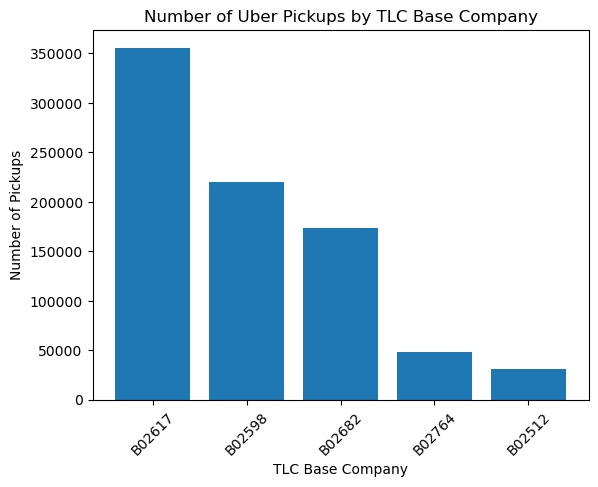

In [50]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
df['Hour'] = pd.to_datetime(df['Date/Time']).dt.hour
base_counts = df['Base'].value_counts()
 

# Create a bar chart
plt.bar(base_counts.index, base_counts.values)
plt.xlabel('TLC Base Company')
plt.ylabel('Number of Pickups')
plt.title('Number of Uber Pickups by TLC Base Company')
plt.xticks(rotation=45)
plt.show()


#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

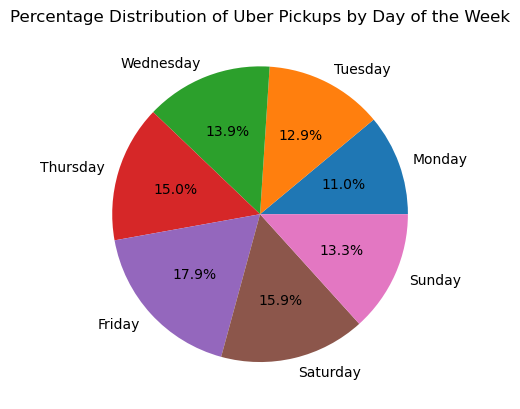

In [60]:
# Group by day of the week and count the number of pickups
#pickup_counts = df.groupby(df['Date/Time'].dt.dayofweek).size()
df['Days'] = df['Date/Time'].dt.dayofweek
day_counts = df.groupby('Days').size()


# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.pie(day_counts, labels=labels, autopct='%1.1f%%')
plt.title('Percentage Distribution of Uber Pickups by Day of the Week')
plt.show()